In [7]:
# Import Dataset
import pandas as pd
import numpy as np

UFC_Data = pd.read_csv("Downloads/archive/preprocessed_data_3.csv")

UFC_Data.head()

,Winner,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_landed,B_avg_TD_landed,B_avg_opp_TD_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_rounds_fought,...,R_Height_cms,R_Reach_cms,B_age,R_age,B_Stance_Orthodox,B_Stance_Southpaw,B_Stance_Other,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Other
0,1,0.000000,0.0,20.0000,45.00000,1.00,6.500,34.000000,277.5000,4,...,170.18,177.80,31,27,1,0,0,1,0,0
1,1,0.500000,0.0,35.0000,16.50000,1.50,0.500,219.500000,24.5000,4,...,182.88,187.96,32,28,1,0,0,1,0,0
2,1,0.015625,0.0,29.6875,27.34375,0.75,0.750,99.211914,94.1250,0,...,187.96,190.50,32,28,1,0,0,0,1,0
3,0,0.015625,0.0,29.6875,27.34375,0.75,0.750,99.211914,94.1250,0,...,160.02,160.02,28,25,0,1,0,0,0,1
4,0,0.125000,0.0,57.9375,28.43750,1.50,0.625,390.250000,156.3125,11,...,167.64,172.72,29,43,1,0,0,1,0,0


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

Winner = UFC_Data.iloc[:,0]
Variables = UFC_Data.iloc[:,1:]

#Scale Data 
scaler = preprocessing.StandardScaler().fit(Variables)
Scaled_Variables = scaler.transform(Variables)

#First trial, no splitting of data into training/test
lr = LogisticRegression(max_iter=290)
lr.fit(Scaled_Variables, Winner)
print(lr.score(Scaled_Variables, Winner))

#Second trial, split data into train and test
Scaled_Variables_train, Scaled_Variables_test, Winner_train, Winner_test = train_test_split(Scaled_Variables, Winner)

lr.fit(Scaled_Variables_train, Winner_train)
print(lr.score(Scaled_Variables_test, Winner_test))

0.6862080650626906
0.693089430894309


In [9]:
#Data Cleaning:
#1)Changed winner to Red = 1 and Blue = 0
#2)Deleted a large amount of redundant variables that correlated with highly similar variables, to prevent multicollinearity

#Investigate logistic model to see which variables are statistically significant
import statsmodels.api as sm

Winner_train = np.asarray(Winner_train)
Scaled_Variables_train=np.asarray(Scaled_Variables_train)

logit_model=sm.Logit(Winner_train, Scaled_Variables_train)
result = logit_model.fit()
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.648176
         Iterations 23
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 4426
Model:                          Logit   Df Residuals:                     4382
Method:                           MLE   Df Model:                           43
Date:                Fri, 06 Oct 2023   Pseudo R-squ.:                -0.02404
Time:                        16:51:54   Log-Likelihood:                -2868.8
converged:                       True   LL-Null:                       -2801.5
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0497      0.037     -1.358      0.175      -0.121       0.022
x2             0.0223      0

In [10]:
#Try again with simpler data model. Dropped all variables that were not statistically significant for both Red and Blue fighters
#Variables that are left: Significant Strikes Landed, TD landed, Age
UFC_Data = pd.read_csv("Downloads/archive/preprocessed_data_4_simple.csv")

UFC_Data.head()

Winner = UFC_Data.iloc[:,0]
Variables = UFC_Data.iloc[:,1:]

#Scale Data 
scaler = preprocessing.StandardScaler().fit(Variables)
Scaled_Variables = scaler.transform(Variables)

#Split data into train and test
Scaled_Variables_train, Scaled_Variables_test, Winner_train, Winner_test = train_test_split(Scaled_Variables, Winner)

#Run logistic Regression again
lr.fit(Scaled_Variables_train, Winner_train)
print(lr.score(Scaled_Variables_test, Winner_test))

0.6802168021680217


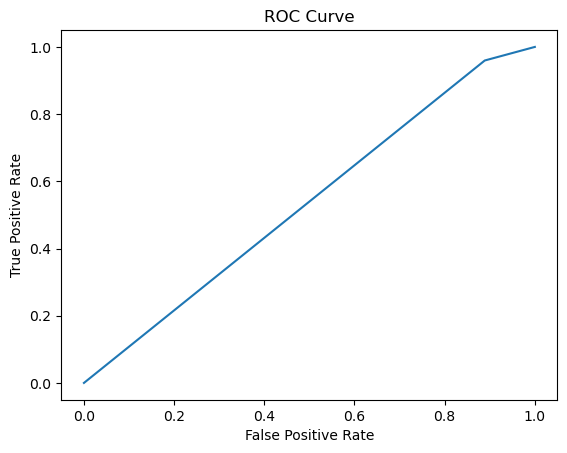

In [13]:
#Get some performance metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

Win_predictions = lr.predict(Scaled_Variables_test)

confusion_matrix(Winner_test, Win_predictions)

fpr,tpr,thresholds = roc_curve(Winner_test, Win_predictions)

plt.plot(fpr, tpr)
plt.plot([0,0],[1,1],'--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()